In [11]:
import os
import numpy as np
import pandas as pd

from astropy import units as u
from astropy.table import Table, Column, MaskedColumn
from astropy.time import Time, TimeDelta
from astropy.coordinates import SkyCoord, Distance, GCRS, CartesianRepresentation, match_coordinates_sky
from astropy.wcs import WCS
from astropy.io import fits, ascii
from astroquery.vizier import Vizier
import itertools

from collections import Counter
import matplotlib.pyplot as plt

import pickle

### 均方差计算

In [12]:
order = np.arange(1, 5)

# MSE_C1_600_RA = np.array([4.9088658113123165, 4.6737496842707875, 4.637584077831652, 4.606084625144476])
# MSE_C1_600_DEC = np.array([4.4955565736276135, 4.479205230502502, 4.359640355607207, 4.483369201839258])

# MSE_C2_600_RA = np.array([2.985374372633888, 2.8677232436623687, 2.772799385811142, 2.753242580786616])
# MSE_C2_600_DEC = np.array([2.9304982365025365, 2.8942246458514113, 2.8833887166944345, 2.8591920255862363])

# MSE_C3_600_RA = np.array([2.7769105448116855, 2.846487039444114, 2.7716548370119565, 2.720154868882504])
# MSE_C3_600_DEC = np.array([3.7727281930481986, 3.8170437595718476, 3.7671542682812356, 3.8053398426729697])



In [13]:
MSE_C1_300_RADEC = np.array([[4.32802889, 3.80815863],[4.21275619, 3.80237315],[4.13298029, 3.72944705],[4.09335017, 3.69666042]])
MSE_C1_600_RADEC = np.array([[4.90886581, 4.49555657],[4.67374968, 4.47920523],[4.63758408, 4.35964036],[4.60608463, 4.4833692 ]])
MSE_C1_900_RADEC = np.array([[3.6350782 , 2.93577866],[3.30577562, 2.9186602 ],[3.2741871 , 2.78795018],[3.2342269 , 2.76843883]])
MSE_C1_1200_RADEC = np.array([[3.90699239, 3.3041059 ],[3.47561625, 3.29523274],[3.45223625, 3.12634812],[3.40603639, 3.0869449 ]])
MSE_C1_1500_RADEC = np.array([[4.22232903, 3.5214809 ],[3.89204307, 3.49886425],[3.83259846, 3.415686  ],[3.80255912, 3.40653826]])

In [14]:
MSE_C2_300_RADEC = np.array([[3.2343257474453946, 2.9549764613394833], [3.135617644537905, 2.9325597236038656], [3.055076024805251, 2.923273350258841], [3.0245347960371944, 2.9059537980914567]])
MSE_C2_900_RADEC = np.array([[3.2372684099791647, 2.93346813586781], [3.093820039514644, 2.8649659486938908], [3.0350314759778034, 2.8884194877045095], [3.0265673700755618, 2.8984506861776]])
MSE_C2_600_RADEC = np.array([[2.98537437, 2.93049024],[2.86772324, 2.89422465],[2.77279939, 2.88338872],[2.75324258, 2.85910203]])
MSE_C2_1200_RADEC = np.array([[3.204094519771831, 3.089361682197902], [3.2396783530622364, 3.076721434466645], [3.131958231108595, 3.05933766683204], [3.150069365588686, 3.070133046504373]])
MSE_C2_1500_RADEC = np.array([[3.04663338, 3.12636872],[3.22254213, 3.10880854],[3.29628462, 3.09433985],[3.20949189, 3.09089044]])


In [15]:
MSE_C3_300_RADEC = np.array([[2.243514  , 2.92876627],[2.22234315, 2.8888705 ],[2.16574957, 2.8694309 ],[2.14311114, 2.88026629]])
MSE_C3_600_RADEC = np.array([[2.77691054, 3.77272819],[2.84648704, 3.81704376],[2.77165484, 3.76715427],[2.72015487, 3.80533984]])
MSE_C3_900_RADEC = np.array([[2.77691054, 3.77272819],[2.84648704, 3.81704376],[2.77165484, 3.76715427],[2.72015487, 3.80533984]])
MSE_C3_1200_RADEC = np.array([[3.53902887, 5.12189246],[3.98685486, 4.88425325],[3.91474521, 4.86097798],[3.77405508, 4.90063604]])
MSE_C3_1500_RADEC = np.array([[3.45276309, 5.22652995], [3.54630944, 5.30953335],[3.39864297, 5.09300897],[3.92245054, 5.1828023]])

### 画图

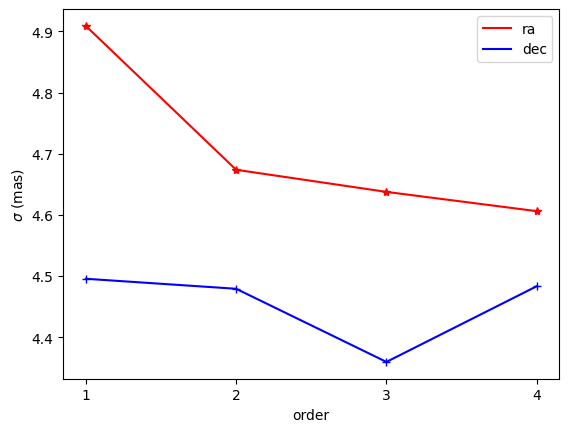

In [29]:
plt.plot(order, MSE_C1_600_RADEC[:, 0], c="r", label="ra")
plt.plot(order, MSE_C1_600_RADEC[:, 0], '*', c="r")
plt.plot(order, MSE_C1_600_RADEC[:, 1], c="b", label="dec")
plt.plot(order, MSE_C1_600_RADEC[:, 1], '+', c="b")
plt.xlabel("order")
plt.ylabel(r"$\sigma$ (mas)")
plt.xticks(order)
plt.legend()

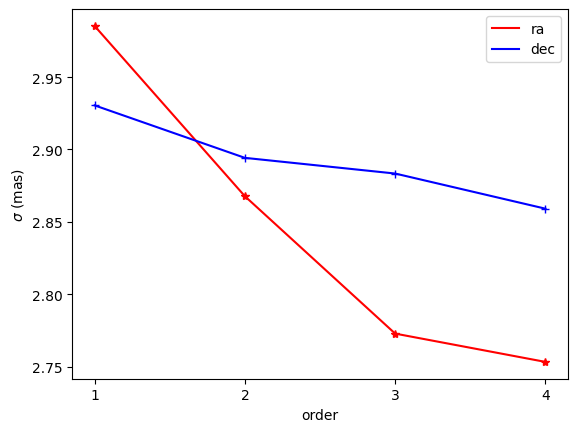

In [31]:
plt.plot(order, MSE_C2_600_RADEC[:, 0], c="r", label="ra")
plt.plot(order, MSE_C2_600_RADEC[:, 0], '*', c="r")
plt.plot(order, MSE_C2_600_RADEC[:, 1], c="b", label="dec")
plt.plot(order, MSE_C2_600_RADEC[:, 1], '+', c="b")
plt.xlabel("order")
plt.ylabel(r"$\sigma$ (mas)")
plt.xticks(order)
plt.legend()

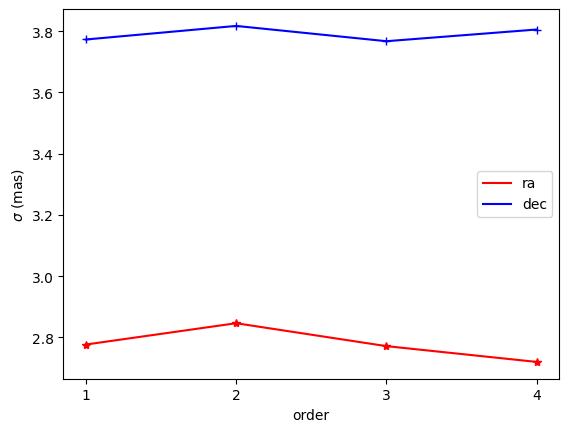

In [30]:
plt.plot(order, MSE_C3_600_RADEC[:, 0], c="r", label="ra")
plt.plot(order, MSE_C3_600_RADEC[:, 0], '*', c="r")
plt.plot(order, MSE_C3_600_RADEC[:, 1], c="b", label="dec")
plt.plot(order, MSE_C3_600_RADEC[:, 1], '+', c="b")
plt.xlabel("order")
plt.ylabel(r"$\sigma$ (mas)")
plt.xticks(order)
plt.legend()

Text(0.5, 1.0, '[scale]-[scale_units]   reference arrow(value=3)')

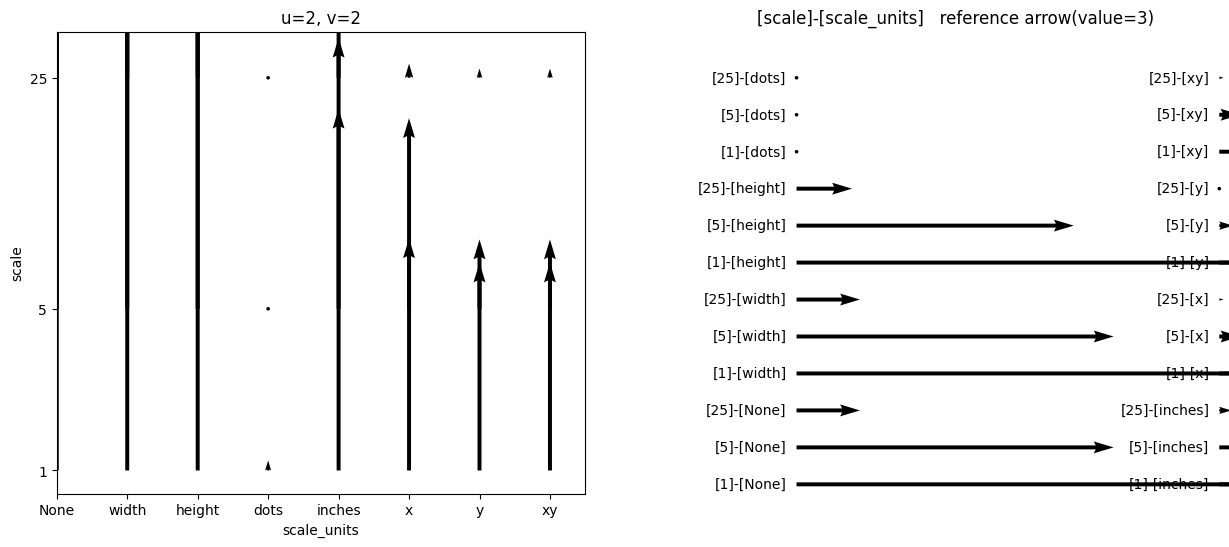

In [37]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.set_xlim(0, 15)
ax1.set_ylim(0, 20)

x = {
    0: None,
    2: 'width',
    4: 'height',
    6: 'dots',
    8: 'inches',
    10: 'x',
    12: 'y',
    14: 'xy'
}
y = {
    1: 1,
    8: 5,
    18: 25,
}

xy = {}
for k1, v1 in x.items():
    for k2, v2 in y.items():
        xy[(k1, k2)] = {'scale': v2, 'scale_units': v1}
u, v = 0, 10

y_loc = 0.1
i = 0
for key, value in xy.items():
    quv = ax1.quiver(key[0], key[1], u, v, scale=value['scale'], scale_units=value['scale_units'])
    if i < len(xy)/2:
        x_s = 1.4
    else:
        x_s = 2.2
    ax2.quiverkey(quv, x_s, 0.02+(i%12)*0.08, 3, '[{}]-[{}]'.format(value['scale'], value['scale_units']), labelpos='W')
    i += 1

# ax.quiver(0, 0, u, v)
xtikclabel = [x if x != None else 'None' for x in list(x.values())]
ytikclabel = [x if x != None else 'None' for x in list(y.values())]

ax1.set_xlabel('scale_units')
ax1.set_ylabel('scale')
ax1.set_xticks(list(x.keys()))
ax1.set_xticklabels(xtikclabel)
ax1.set_yticks(list(y.keys()))
ax1.set_yticklabels(ytikclabel)
ax1.set_title('u=2, v=2')

ax2.set_axis_off()
ax2.set_title('[scale]-[scale_units]   reference arrow(value=3)')

# name = 'test2'
# fig.savefig(r'ERA5数据处理\输出\测试\{}.png'.format(name), dpi=500)
# plt.show()

In [38]:
xy

{(0, 1): {'scale': 1, 'scale_units': None},
 (0, 8): {'scale': 5, 'scale_units': None},
 (0, 18): {'scale': 25, 'scale_units': None},
 (2, 1): {'scale': 1, 'scale_units': 'width'},
 (2, 8): {'scale': 5, 'scale_units': 'width'},
 (2, 18): {'scale': 25, 'scale_units': 'width'},
 (4, 1): {'scale': 1, 'scale_units': 'height'},
 (4, 8): {'scale': 5, 'scale_units': 'height'},
 (4, 18): {'scale': 25, 'scale_units': 'height'},
 (6, 1): {'scale': 1, 'scale_units': 'dots'},
 (6, 8): {'scale': 5, 'scale_units': 'dots'},
 (6, 18): {'scale': 25, 'scale_units': 'dots'},
 (8, 1): {'scale': 1, 'scale_units': 'inches'},
 (8, 8): {'scale': 5, 'scale_units': 'inches'},
 (8, 18): {'scale': 25, 'scale_units': 'inches'},
 (10, 1): {'scale': 1, 'scale_units': 'x'},
 (10, 8): {'scale': 5, 'scale_units': 'x'},
 (10, 18): {'scale': 25, 'scale_units': 'x'},
 (12, 1): {'scale': 1, 'scale_units': 'y'},
 (12, 8): {'scale': 5, 'scale_units': 'y'},
 (12, 18): {'scale': 25, 'scale_units': 'y'},
 (14, 1): {'scale': 1, 